# Performance Indicators (Indicadores de Performance)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data/base-seguros.xlsx', sheet_name='Base')

## Churn Rate

Churn é o indicador que nos mostra quais clientes n!ao renovaram os seguros.
Ou seja, é o inverso da variável Flag_Renovou, no dataframe onde 1 é o cliente que "deu churn" - não renovou o seguro e 0 é o cliente que se manteve na base.
Criamos essa nova coluna para poder analisar outros indicadores mais à frente.

In [3]:
df['churn'] = 1 - df['Flag_Renovou']

In [66]:
df[['Flag_Renovou', 'churn']].head()

,Flag_Renovou,churn
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1


In [ ]:
# Trazendo a função para tabelas de frequência

def tab_freq(df, col):
    tab_freq = df[col].value_counts().reset_index()
    tab_freq.columns = [col, 'Frequência_Absoluta']

    # Freq. Relativa
    tab_freq['Frequência_Relativa'] = (100 * (tab_freq['Frequência_Absoluta'] / tab_freq['Frequência_Absoluta'].sum())).round(2)
    
    # Contagem Acumulada
    tab_freq['Frequência_Acumulada'] = tab_freq['Frequência_Absoluta'].cumsum()

    # Percentual Acumulado
    tab_freq['% Acumulado'] = tab_freq['Frequência_Relativa'].cumsum().round(2)

    return tab_freq

In [11]:
tab_freq(df, 'churn')

,churn,Frequência_Absoluta,Frequência_Relativa,Frequência_Acumulada,% Acumulado
0,1,20106,87.19,20106,87.19
1,0,2954,12.81,23060,100.00


In [14]:
churn_rate_geral = df['churn'].mean()
print(f'Overall churn rate: {churn_rate_geral:.2%}. This means that more than 87% of customers did not renew their insurance.')

Overall churn rate: 87.19%. This means that more than 87% of customers did not renew their insurance.


## Churn rate by vehicle region (Taxa de cancelamento por região)

In [20]:
churn_por_regiao = df.groupby('Veic_Regiao')['churn'].mean().sort_values(ascending=False)
print(churn_por_regiao)

Veic_Regiao
Reg2     0.926259
Reg5     0.899624
Reg1     0.894822
Reg7     0.881496
Reg6     0.879357
Reg3     0.877942
Reg4     0.873295
Reg8     0.870202
Reg10    0.868496
Reg13    0.855705
Reg9     0.850299
Reg11    0.845878
Reg14    0.841738
Reg12    0.819623
Name: churn, dtype: float64


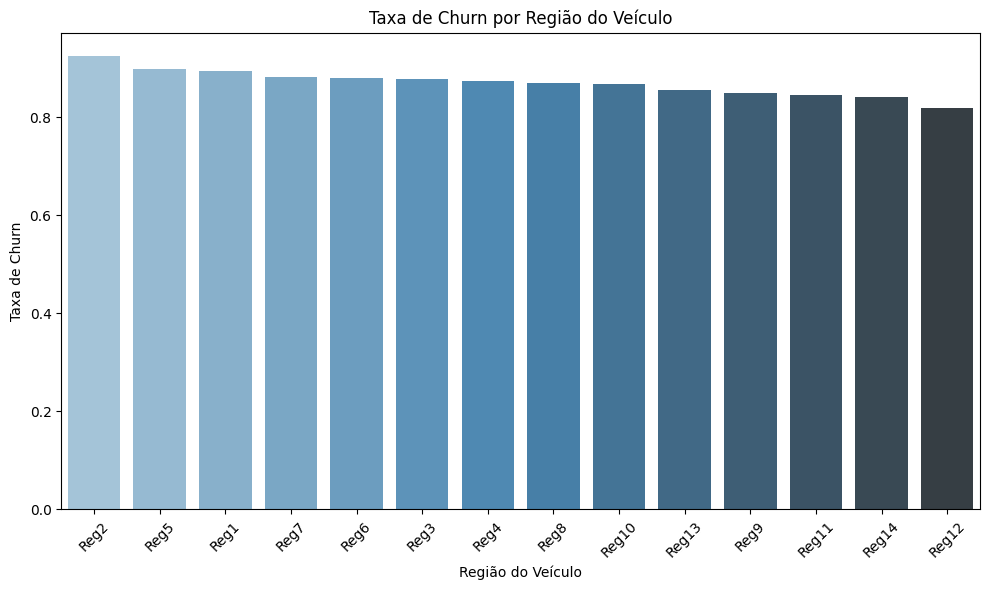

In [ ]:
# Reset do índice para converter a Série em DataFrame
churn_por_regiao_df = churn_por_regiao.reset_index()
churn_por_regiao_df.columns = ['Veic_Regiao', 'Churn Rate']

# Adicionar coluna para hue com os mesmos valores de x 
churn_por_regiao_df['hue'] = churn_por_regiao_df['Veic_Regiao']

# Criar o gráfico 
plt.figure(figsize=(10, 6))
sns.barplot(
    data=churn_por_regiao_df,
    x='Veic_Regiao',
    y='Churn Rate',
    hue='hue',
    palette='Blues_d',
    dodge=False,
    legend=False  
)
plt.title('Taxa de Churn por Região do Veículo')
plt.ylabel('Taxa de Churn')
plt.xlabel('Região do Veículo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

As taxa de churn são bastante parecidas, mas a região 2 possui um índice de cancelamentos um pouco maior que as demais.

## Churn rate by risk profile (Taxa de cancelamento por perfil de risco)

In [24]:
churn_por_perfil = df.groupby('Perfil_Risco')['churn'].mean().sort_values(ascending=False)
print(churn_por_perfil)

Perfil_Risco
up        0.902186
stable    0.897723
down      0.838700
Name: churn, dtype: float64


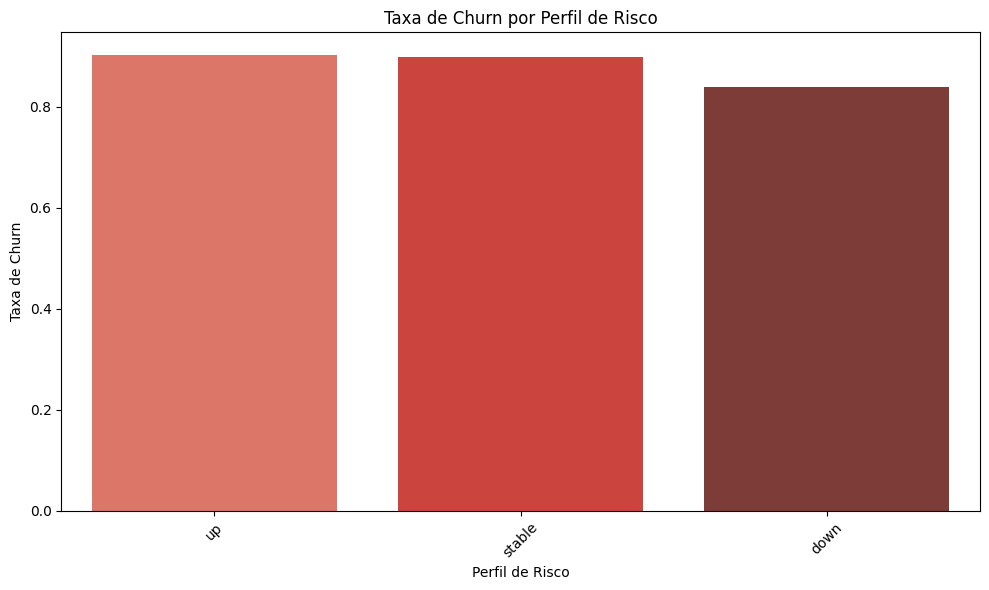

In [ ]:
# Calcular churn por perfil de risco
churn_por_perfil = df.groupby('Perfil_Risco')['churn'].mean().sort_values(ascending=False)

# Reset do índice e montagem dos dados
churn_por_perfil_df = churn_por_perfil.reset_index()
churn_por_perfil_df.columns = ['Perfil_Risco', 'Churn Rate']
churn_por_perfil_df['hue'] = churn_por_perfil_df['Perfil_Risco']

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=churn_por_perfil_df,
    x='Perfil_Risco',
    y='Churn Rate',
    hue='hue',
    palette='Reds_d',
    dodge=False,
    legend=False
)
plt.title('Taxa de Churn por Perfil de Risco')
plt.ylabel('Taxa de Churn')
plt.xlabel('Perfil de Risco')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

O churn é levemente superior para clientes que tiveram aumento no perfil de risco.
Isso talvez faça algum sentido, considerando que o valor dos seguros tende a ser mais alto para clientes de maior risco.

## LTV (Lifetime Value)

Vamos calcular o LTV para entender que perfis de clientes trazem mais valor à empresa.

In [32]:
df['LTV'] = df['Premio_Final'] * df['Tempo_Apolice']

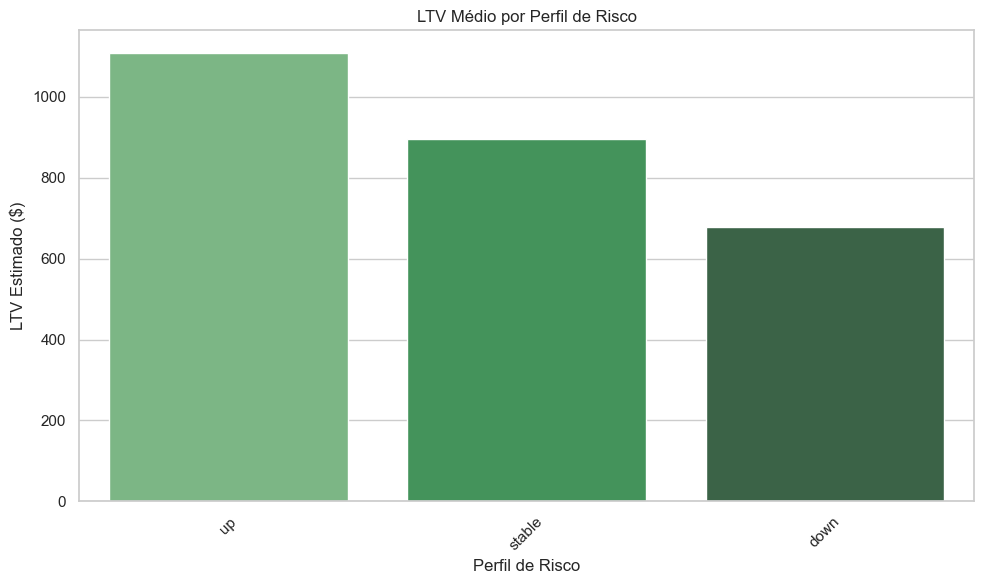

In [67]:
# Calcular LTV médio por perfil de risco
ltv_por_perfil = df.groupby('Perfil_Risco')['LTV'].mean().sort_values(ascending=False)

# Preparar DataFrame para o gráfico
ltv_por_perfil_df = ltv_por_perfil.reset_index()
ltv_por_perfil_df.columns = ['Perfil_Risco', 'LTV']
ltv_por_perfil_df['hue'] = ltv_por_perfil_df['Perfil_Risco']

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    data=ltv_por_perfil_df,
    x='Perfil_Risco',
    y='LTV',
    hue='hue',
    palette='Greens_d',
    dodge=False,
    legend=False
)
plt.title('LTV Médio por Perfil de Risco')
plt.ylabel('LTV Estimado ($)')
plt.xlabel('Perfil de Risco')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Apesar de os clientes que tiveram aumento no perfil de risco terem uma taxa de churn maior, ainda assim são eles os clientes que possuem o maior LTV entre os perfis, na média.

## Comparison between risk profilem, churn and LTV (Comparativo entre perfil de risco, taxas de cancelamento e LTV)

C:\Users\marce\AppData\Local\Temp\ipykernel_20472\1645938138.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=churn_com_ltv, x='Perfil_Risco', y='LTV', palette='coolwarm')


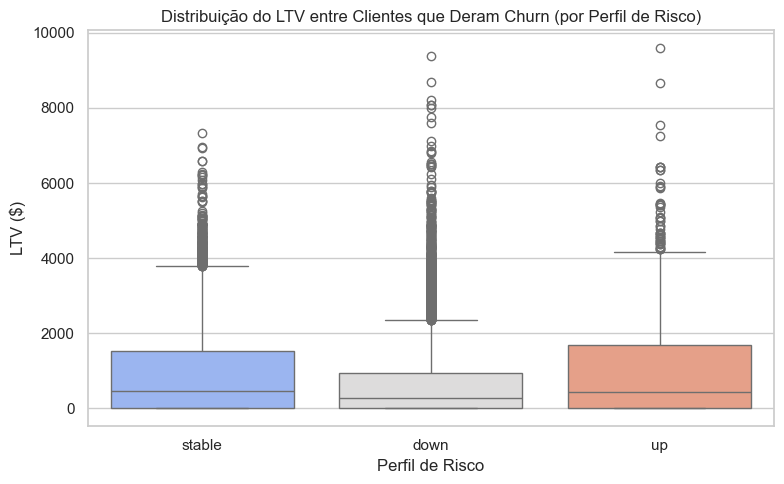

In [74]:
# Filtra os dados de churn
churn_com_ltv = df[df['churn'] == 1][['Perfil_Risco', 'LTV']]

# Gráfico boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=churn_com_ltv, x='Perfil_Risco', y='LTV', palette='coolwarm')

plt.title('Distribuição do LTV entre Clientes que Deram Churn (por Perfil de Risco)')
plt.ylabel('LTV ($)')
plt.xlabel('Perfil de Risco')
plt.tight_layout()
plt.show()

CLientes com perfil de risco que diminuíram ao longo do tempo possuem uma menor distribuição em termos de LTV, porém, visualmente não notam-se grandes diferenças entre os três perfis de risco.

## Average LTV by profile for churners

In [36]:
ltv_churn_por_perfil = churn_com_ltv.groupby('Perfil_Risco')['LTV'].mean().sort_values(ascending=False)
print(ltv_churn_por_perfil)

Perfil_Risco
up        1112.923418
stable     907.992359
down       694.162155
Name: LTV, dtype: float64


C:\Users\marce\AppData\Local\Temp\ipykernel_20472\2434922570.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


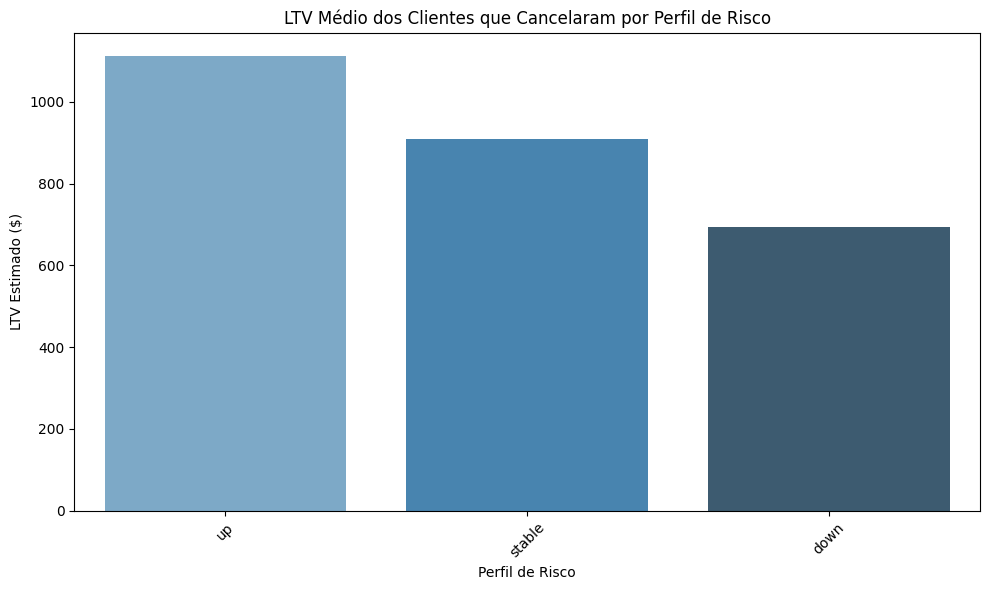

In [38]:
ltv_churn_por_perfil_df = ltv_churn_por_perfil.reset_index()
ltv_churn_por_perfil_df.columns = ['Perfil_Risco', 'LTV']

plt.figure(figsize=(10, 6))
sns.barplot(
    data=ltv_churn_por_perfil_df,
    x='Perfil_Risco',
    y='LTV',
    palette='Blues_d',
    dodge=False
)
plt.title('LTV Médio dos Clientes que Cancelaram por Perfil de Risco')
plt.ylabel('LTV Estimado ($)')
plt.xlabel('Perfil de Risco')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Vamos agora cruzar o LTV com o preço pago e risco de churn, para identificar perfis de clientes que pagam mais, geram alto valor, mas ainda assim não renovam — ou seja, grandes oportunidades de retenção estratégica.

## Metrícas agrupadas por perfil (Metrics grouped by profile)

In [39]:
# Agrupar por Perfil_Risco
resumo_perfil = df.groupby('Perfil_Risco').agg({
    'LTV': 'mean',
    'Premio_Final': 'mean',
    'churn': 'mean'
}).sort_values(by='LTV', ascending=False)

# Renomear colunas
resumo_perfil.columns = ['LTV Médio', 'Prêmio Médio', 'Taxa de Churn']

resumo_perfil.reset_index(inplace=True)

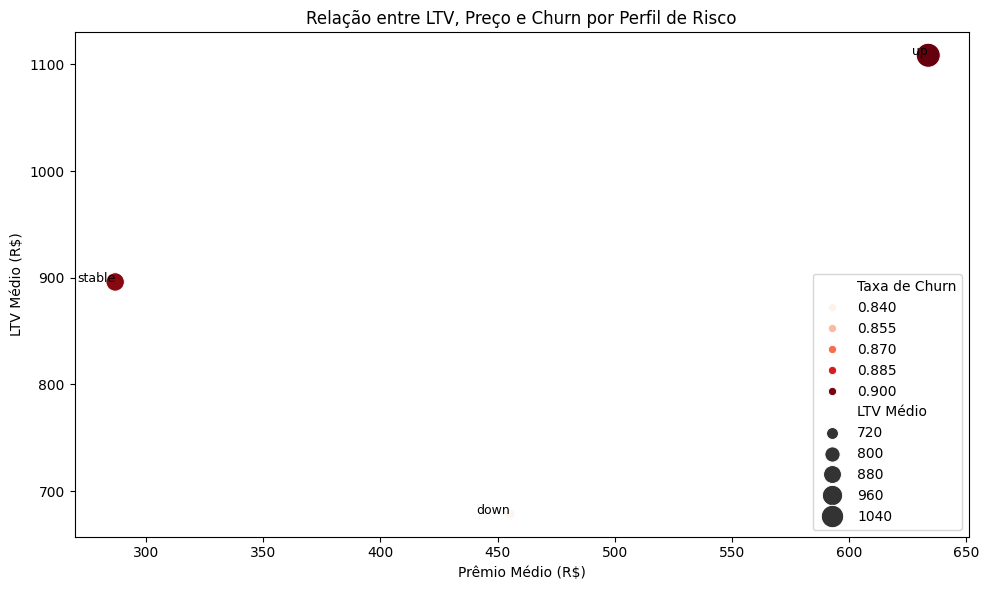

In [40]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=resumo_perfil,
    x='Prêmio Médio',
    y='LTV Médio',
    hue='Taxa de Churn',
    size='LTV Médio',
    palette='Reds',
    legend='brief',
    sizes=(50, 300)
)

for i in range(resumo_perfil.shape[0]):
    plt.text(
        resumo_perfil['Prêmio Médio'][i],
        resumo_perfil['LTV Médio'][i],
        resumo_perfil['Perfil_Risco'][i],
        fontsize=9,
        ha='right'
    )

plt.title('Relação entre LTV, Preço e Churn por Perfil de Risco')
plt.xlabel('Prêmio Médio (R$)')
plt.ylabel('LTV Médio (R$)')
plt.tight_layout()
plt.show()


Análise:

Pontos maiores = perfis mais lucrativos (alto LTV).

Cores mais escuras = perfis com alta taxa de churn.

Perfis com alto LTV e churn alto são os mais críticos: geram receita, mas não renovam os seguros.

## Value vs Risk Matrix (churn) - Valor x Matriz de Risco

In [41]:
# Calcular médias para definir cortes
ltv_medio_geral = resumo_perfil['LTV Médio'].mean()
churn_medio_geral = resumo_perfil['Taxa de Churn'].mean()

# Classificar Valor
resumo_perfil['Valor'] = resumo_perfil['LTV Médio'].apply(
    lambda x: 'Alto Valor' if x >= ltv_medio_geral else 'Baixo Valor'
)

# Classificar Risco
resumo_perfil['Risco'] = resumo_perfil['Taxa de Churn'].apply(
    lambda x: 'Alto Risco' if x >= churn_medio_geral else 'Baixo Risco'
)

In [75]:
# Classificação dos clientes por segmento

def classificar_segmento(valor, risco):
    if valor == 'Alto Valor' and risco == 'Alto Risco':
        return 'Manter com Urgência'
    elif valor == 'Alto Valor' and risco == 'Baixo Risco':
        return 'Proteger'
    elif valor == 'Baixo Valor' and risco == 'Alto Risco':
        return 'Reavaliar'
    else:
        return 'Potencial de Crescimento'

resumo_perfil['Segmento'] = resumo_perfil.apply(
    lambda row: classificar_segmento(row['Valor'], row['Risco']),
    axis=1
)


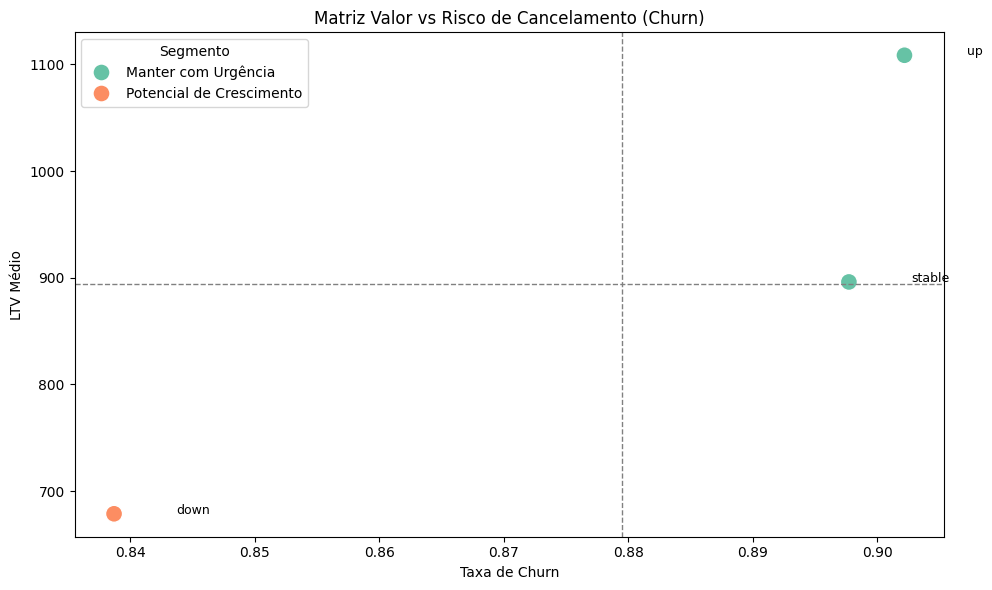

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=resumo_perfil,
    x='Taxa de Churn',
    y='LTV Médio',
    hue='Segmento',
    palette='Set2',
    s=150
)

# Adicionar rótulos
for i in range(resumo_perfil.shape[0]):
    plt.text(
        resumo_perfil['Taxa de Churn'][i] + 0.005,
        resumo_perfil['LTV Médio'][i],
        resumo_perfil['Perfil_Risco'][i],
        fontsize=9
    )

plt.axhline(ltv_medio_geral, color='gray', linestyle='--', linewidth=1)
plt.axvline(churn_medio_geral, color='gray', linestyle='--', linewidth=1)

plt.title('Matriz Valor vs Risco de Cancelamento (Churn)')
plt.xlabel('Taxa de Churn')
plt.ylabel('LTV Médio')
plt.tight_layout()
plt.show()


In [47]:
# Exportar o DataFrame final com os segmentos
resumo_perfil.to_csv('matriz_valor_risco.csv', index=False)

## Strategic Indicators

### Retention Rate

In [53]:
# Churn já deve existir como coluna binária
taxa_churn = df['churn'].mean()
taxa_retencao = 1 - taxa_churn
print(f"Taxa de Churn: {taxa_churn:.2%}")
print(f"Taxa de Retenção: {taxa_retencao:.2%}")

Taxa de Churn: 87.19%
Taxa de Retenção: 12.81%


### Average Ticket by Segment

C:\Users\marce\AppData\Local\Temp\ipykernel_20472\1598363818.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf1 = sns.barplot(data=ticket_medio_perfil, x='Perfil_Risco', y='Premio_Final', palette='Blues_d')


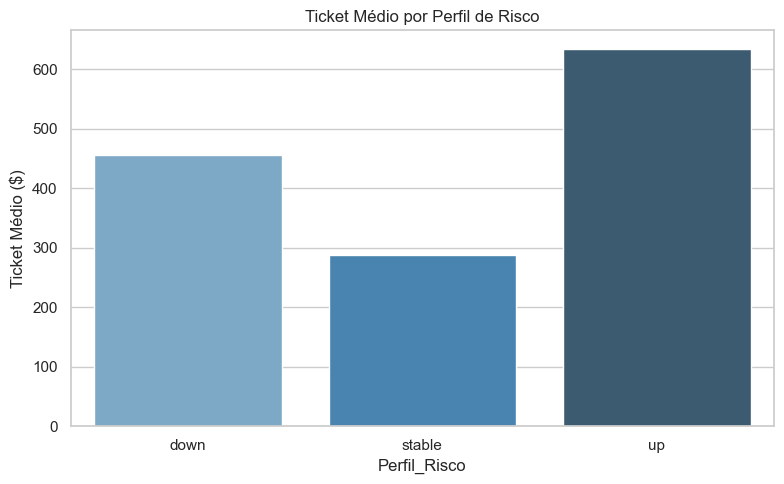

In [59]:
# Agrupamento
ticket_medio_perfil = df.groupby('Perfil_Risco')['Premio_Final'].mean().reset_index()

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
graf1 = sns.barplot(data=ticket_medio_perfil, x='Perfil_Risco', y='Premio_Final', palette='Blues_d')
graf1.set_title('Ticket Médio por Perfil de Risco')
graf1.set_ylabel('Ticket Médio ($)')
plt.tight_layout()
plt.show()


### Average Discount Applied vs Churn

C:\Users\marce\AppData\Local\Temp\ipykernel_20472\906010567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf2 = sns.barplot(data=desconto_vs_churn, x='churn', y='Desconto_Aplicado', palette='Greens_d')


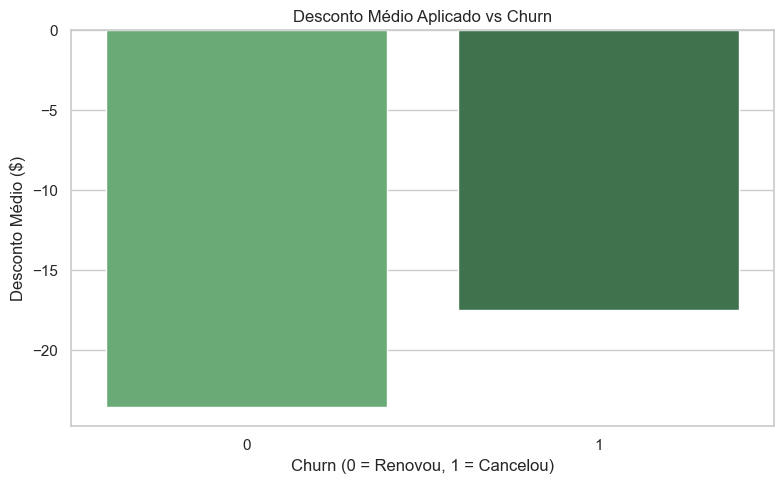

In [60]:
# Cálculo
df['Desconto_Aplicado'] = df['Premio_Orig'] - df['Premio_Final']
desconto_vs_churn = df.groupby('churn')['Desconto_Aplicado'].mean().reset_index()

# Gráfico
plt.figure(figsize=(8, 5))
graf2 = sns.barplot(data=desconto_vs_churn, x='churn', y='Desconto_Aplicado', palette='Greens_d')
graf2.set_title('Desconto Médio Aplicado vs Churn')
graf2.set_ylabel('Desconto Médio ($)')
graf2.set_xlabel('Churn (0 = Renovou, 1 = Cancelou)')
plt.tight_layout()
plt.show()

### Price Gap and Competing Companies by Profile

C:\Users\marce\AppData\Local\Temp\ipykernel_20472\1273947443.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf3 = sns.barplot(data=gap_por_perfil, x='Perfil_Risco', y='Gap_Concorrencia', palette='Reds_d')


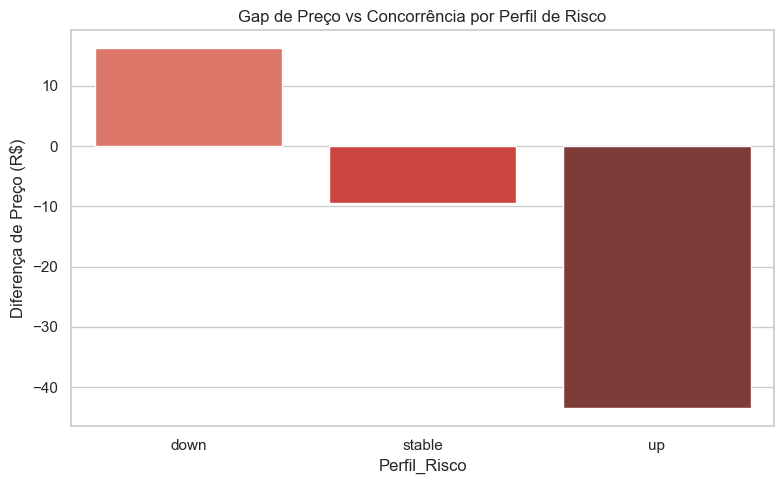

In [61]:
# Cálculo
df['Gap_Concorrencia'] = df['Premio_Final'] - df['Premio_Mercado']
gap_por_perfil = df.groupby('Perfil_Risco')['Gap_Concorrencia'].mean().reset_index()

# Gráfico
plt.figure(figsize=(8, 5))
graf3 = sns.barplot(data=gap_por_perfil, x='Perfil_Risco', y='Gap_Concorrencia', palette='Reds_d')
graf3.set_title('Gap de Preço vs Concorrência por Perfil de Risco')
graf3.set_ylabel('Diferença de Preço (R$)')
plt.tight_layout()
plt.show()

### Loyalty Score by Profile

C:\Users\marce\AppData\Local\Temp\ipykernel_20472\2630485225.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf4 = sns.barplot(data=score_por_perfil, x='Perfil_Risco', y='Score_Fidelidade', palette='Purples_d')


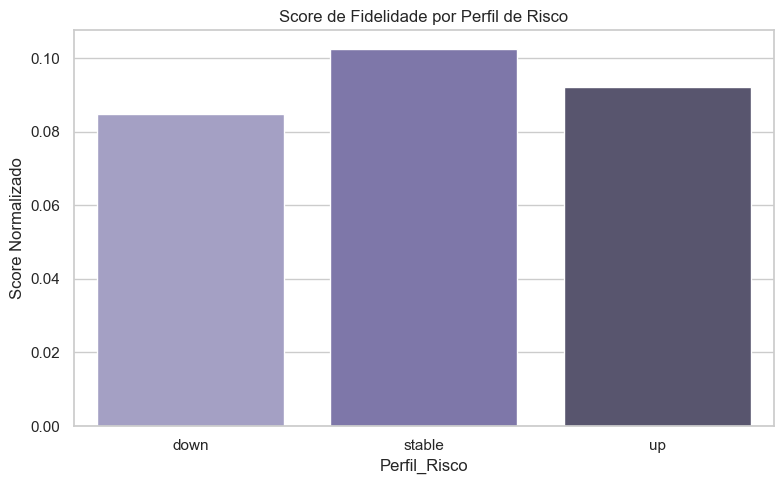

In [62]:
# Cálculo
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Tempo_Apolice_norm', 'Qte_Apolices_norm', 'Premio_Pago_Ult_norm']] = scaler.fit_transform(
    df[['Tempo_Apolice', 'Qte_Apolices', 'Premio_Pago_Ult']]
)

df['Score_Fidelidade'] = (
    df['Tempo_Apolice_norm'] * 0.4 +
    df['Qte_Apolices_norm'] * 0.3 +
    df['Premio_Pago_Ult_norm'] * 0.3
)

score_por_perfil = df.groupby('Perfil_Risco')['Score_Fidelidade'].mean().reset_index()

# Gráfico
plt.figure(figsize=(8, 5))
graf4 = sns.barplot(data=score_por_perfil, x='Perfil_Risco', y='Score_Fidelidade', palette='Purples_d')
graf4.set_title('Score de Fidelidade por Perfil de Risco')
graf4.set_ylabel('Score Normalizado')
plt.tight_layout()
plt.show()


### Estimated Cost of Churn by Risk Profile

C:\Users\marce\AppData\Local\Temp\ipykernel_20472\3217098169.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graf5 = sns.barplot(data=custo_churn_por_perfil, x='Perfil_Risco', y='Custo_Churn', palette='Oranges_d')


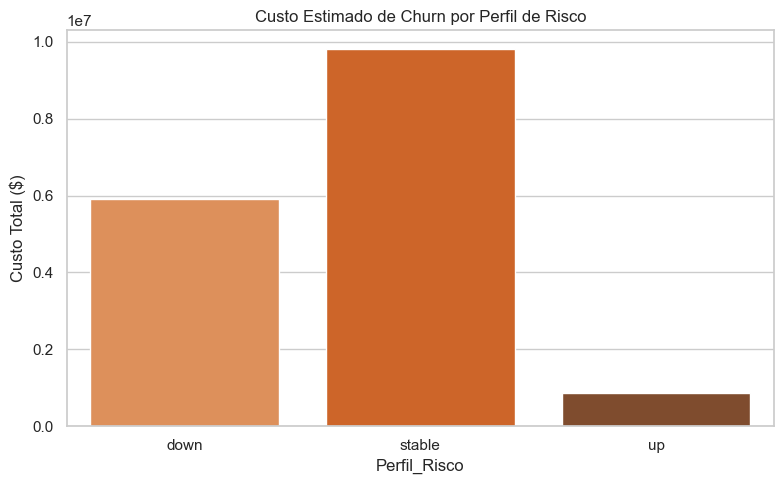

In [64]:
# Cálculo
df['Custo_Churn'] = df['LTV'] * df['churn']
custo_churn_por_perfil = df.groupby('Perfil_Risco')['Custo_Churn'].sum().reset_index()

# Gráfico
plt.figure(figsize=(8, 5))
graf5 = sns.barplot(data=custo_churn_por_perfil, x='Perfil_Risco', y='Custo_Churn', palette='Oranges_d')
graf5.set_title('Custo Estimado de Churn por Perfil de Risco')
graf5.set_ylabel('Custo Total ($)')
plt.tight_layout()
plt.show()

### Price Sensitivity

In [55]:
df['Desconto_Aplicado'] = df['Premio_Orig'] - df['Premio_Final']
# Verifique se há relação com churn
desconto_vs_churn = df.groupby('churn')['Desconto_Aplicado'].mean()